In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install kaggle

In [3]:
import os
os.environ['KAGGLE_USERNAME'] = "drvinaymanohar" # username from the json file
os.environ['KAGGLE_KEY'] = "df39c9b2efc58d35c190ae0d8f607767" # key from the json file

In [4]:
!kaggle datasets download -d tawsifurrahman/covid19-radiography-database

 98% 765M/778M [00:09<00:00, 97.7MB/s]
100% 778M/778M [00:09<00:00, 89.9MB/s]


In [5]:
!unzip covid19-radiography-database.zip

Streaming output truncated to the last 5000 lines.
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7921.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7922.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7923.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7924.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7925.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7926.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7927.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7928.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7929.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-793.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7930.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7931.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7932.png  
 

In [6]:
# import system libs
import os
import time
import shutil
import pathlib
import itertools

# import data handling tools
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

In [7]:
import glob
Covid_images_path = "/content/COVID-19_Radiography_Dataset/COVID/images/"
Normal_images_path = "/content/COVID-19_Radiography_Dataset/Normal/images/"

covid_images_list = glob.glob(os.path.join(Covid_images_path, '*.png'))
Normal_images_list = glob.glob(os.path.join(Normal_images_path, '*.png'))

In [8]:
len(covid_images_list)

3616

In [9]:
len(Normal_images_list)

10192

In [10]:
import tensorflow as tf

labels = ['NORMAL', 'COVID']
X= []
y = []

for name in Normal_images_list:
  y.append(0)
  img = cv2.imread(name)
  img = tf.keras.preprocessing.image.img_to_array(img)
  img = cv2.resize(img,(128,128))
  X.append((img))

for name in covid_images_list:
  y.append(1)
  img = cv2.imread(name)
  img = tf.keras.preprocessing.image.img_to_array(img)
  img = cv2.resize(img,(128,128))
  X.append((img))

In [11]:
len(X)

13808

In [12]:
len(y)

13808

In [13]:
X[0]

array([[[19.228302 , 19.228302 , 19.228302 ],
        [19.338547 , 19.338547 , 19.338547 ],
        [19.335938 , 19.335938 , 19.335938 ],
        ...,
        [21.562943 , 21.562943 , 21.562943 ],
        [21.335938 , 21.335938 , 21.335938 ],
        [26.003906 , 26.003906 , 26.003906 ]],

       [[21.32814  , 21.32814  , 21.32814  ],
        [20.       , 20.       , 20.       ],
        [20.       , 20.       , 20.       ],
        ...,
        [22.660156 , 22.660156 , 22.660156 ],
        [23.007797 , 23.007797 , 23.007797 ],
        [25.670578 , 25.670578 , 25.670578 ]],

       [[20.335938 , 20.335938 , 20.335938 ],
        [20.660156 , 20.660156 , 20.660156 ],
        [20.       , 20.       , 20.       ],
        ...,
        [22.320312 , 22.320312 , 22.320312 ],
        [24.317734 , 24.317734 , 24.317734 ],
        [27.448776 , 27.448776 , 27.448776 ]],

       ...,

       [[34.852005 , 34.852005 , 34.852005 ],
        [36.27867  , 36.27867  , 36.27867  ],
        [35.409637 , 3

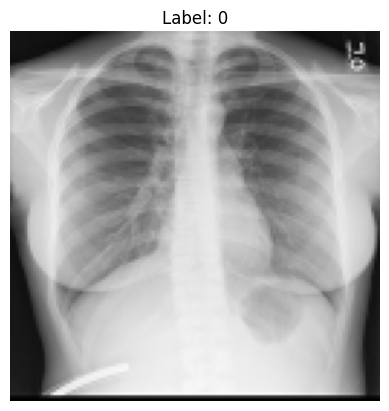

In [14]:
plt.imshow(X[0].astype(int))
plt.title(f"Label: {y[0]}")
plt.axis('off')
plt.show()

In [15]:
# Converting to Array
X = np.array(X)
y = np.array(y)

In [16]:
print(X.shape)
print(y.shape)

(13808, 128, 128, 3)
(13808,)


In [17]:
# Save the image data as a .npy file
X_file_path = '/content/drive/MyDrive/COVID/X.npy'
y_file_path = '/content/drive/MyDrive/COVID/y.npy'
np.save(X_file_path, X)
np.save(y_file_path, y)